<a href="https://colab.research.google.com/github/anas-hamada/projects/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# uploading the data
df=pd.read_csv('/content/train.csv',index_col='Id')

In [ ]:
# displaying the first 5 rows
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# creating x and y from our dataset

In [ ]:
X=df.iloc[:,:-1]

In [ ]:
y=df.SalePrice

In [ ]:
# exploring x a little bit

In [ ]:
X.head(30)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml


In [ ]:
X.shape

(1460, 79)

In [ ]:
X.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [ ]:
X.info()

In [ ]:
# what are the null values and what should i replace them with

In [ ]:
X.isnull().sum()[X.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [ ]:
# none values of some features are not missed values instead they mean that the feature does not exist so the value should be zero
# but these values are really missed “LotFrontage” ,“Electrical”, “MasVnrType”, “MasVnrArea” 

In [ ]:
X1=X.copy()
X1['LotFrontage'].fillna(X1['LotFrontage'].mean(),inplace= True)
X1['Electrical'].fillna(X1['Electrical'].mode()[0],inplace= True)
X1['MasVnrType'].fillna(X1['MasVnrType'].mode()[0],inplace= True)
X1['MasVnrArea'].fillna(X1['MasVnrArea'].mean(),inplace= True)
X1 = X1.replace(['None'], 0)

In [ ]:
X1.isnull().sum()[X1.isnull().sum()>0]

Alley           1369
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [ ]:
X1.fillna(0,inplace=True)

In [ ]:
X1.isnull().sum().max()

0

In [ ]:
X1.head(30)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.000000,8450,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,80.000000,9600,Pave,0,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,68.000000,11250,Pave,0,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,60.000000,9550,Pave,0,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,84.000000,14260,Pave,0,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,0,12,2008,WD,Normal
6,50,RL,85.000000,14115,Pave,0,IR1,Lvl,AllPub,Inside,...,0,0,0,MnPrv,Shed,700,10,2009,WD,Normal
7,20,RL,75.000000,10084,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,8,2007,WD,Normal
8,60,RL,70.049958,10382,Pave,0,IR1,Lvl,AllPub,Corner,...,0,0,0,0,Shed,350,11,2009,WD,Normal
9,50,RM,51.000000,6120,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,4,2008,WD,Abnorml


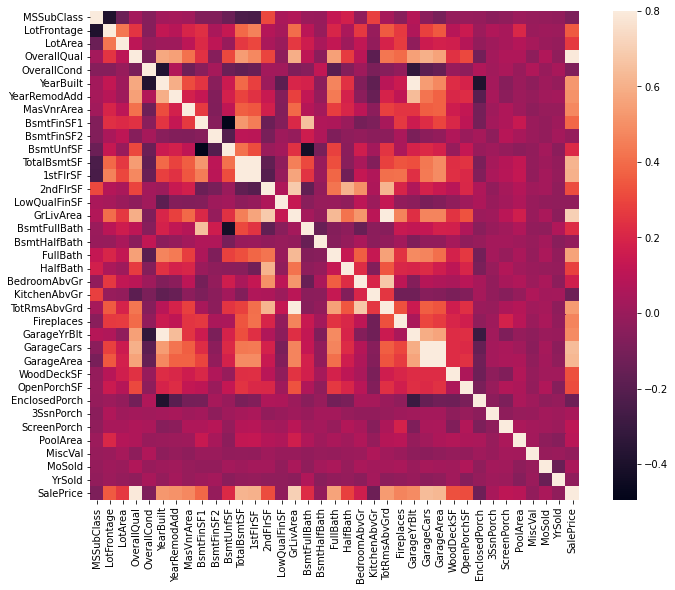

In [ ]:
#correlation matrix to find the linearity relation between the features
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
# why did the modified rows X1.corr() like lotFrontage row didnt change from df.corr() rows and why didnt we use X1 with adding the sale price from the first place
# why not encode the char data first and then choosing the best features with char data included

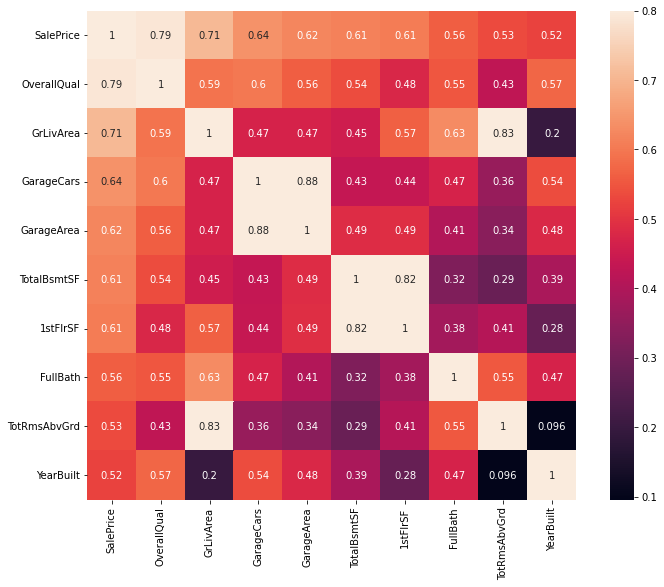

In [ ]:
# choosing the best ten features
k=10
cols = corrmat.nlargest(k, 'SalePrice')[corrmat.nlargest(k, 'SalePrice').index]
fa, axe = plt.subplots(figsize=(12, 9))
sns.heatmap(cols, vmax=.8, square=True,annot=True);

In [ ]:
X2=X1[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]

In [ ]:
X2

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
Id,,,,,,
1,7,1710,2,856,2,2003
2,6,1262,2,1262,2,1976
3,7,1786,2,920,2,2001
4,7,1717,3,756,1,1915
5,8,2198,3,1145,2,2000
...,...,...,...,...,...,...
1456,6,1647,2,953,2,1999
1457,6,2073,2,1542,2,1978
1458,7,2340,1,1152,2,1941


In [ ]:
# feature encoding
X2=pd.get_dummies(X2,drop_first=True)
X2

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
Id,,,,,,
1,7,1710,2,856,2,2003
2,6,1262,2,1262,2,1976
3,7,1786,2,920,2,2001
4,7,1717,3,756,1,1915
5,8,2198,3,1145,2,2000
...,...,...,...,...,...,...
1456,6,1647,2,953,2,1999
1457,6,2073,2,1542,2,1978
1458,7,2340,1,1152,2,1941


In [ ]:
# feature scaling
c=X2.columns
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
X2=scaling.fit_transform(X2)
X2=pd.DataFrame(X2,columns=c)
X2.head(30)
# when we scale the features they will be big or small because of outliers , but what is the problem if the weights are going to adapt to it , maybe because the model will predict very badly for outliers values , while if we didnt use outlires values for scaling it will give a fine result for outliers values

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
0,0.666667,0.259231,0.50,0.140098,0.666667,0.949275
1,0.555556,0.174830,0.50,0.206547,0.666667,0.753623
2,0.666667,0.273549,0.50,0.150573,0.666667,0.934783
3,0.666667,0.260550,0.75,0.123732,0.333333,0.311594
4,0.777778,0.351168,0.75,0.187398,0.666667,0.927536
5,0.444444,0.193670,0.50,0.130278,0.333333,0.876812
6,0.777778,0.256217,0.50,0.275941,0.666667,0.956522
7,0.666667,0.330821,0.50,0.181178,0.666667,0.731884
8,0.666667,0.271289,0.50,0.155810,0.666667,0.427536
9,0.444444,0.139977,0.25,0.162193,0.333333,0.485507


In [ ]:
X2.shape

(1460, 6)

In [ ]:
X2.describe()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.566591,0.222582,0.441781,0.173065,0.521689,0.719332
std,0.153666,0.098998,0.186829,0.071801,0.183639,0.218862
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.444444,0.149868,0.250000,0.130237,0.333333,0.594203
50%,0.555556,0.212886,0.500000,0.162275,0.666667,0.731884
75%,0.666667,0.271807,0.500000,0.212480,0.666667,0.927536
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

In [ ]:
# trying different models with different parameters to find the best ones

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

In [ ]:
# a dictionary of regression models with different parameters
model_params = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params' : {
           'fit_intercept':['False','True'],
           'positive':['False','True']
        }  
    },
    'Lasso': {
        'model': Lasso(),
        'params' : {
            'max_iter':[1000],
           'alpha':[0.05,0.1,0.5,1,3,5]
        }  
    },
     'Ridge': {
        'model': Ridge(),
        'params' : {
            'max_iter':[5,10,500,100],
           'alpha':[0.1,0.5,1,5,3],
          # 'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga','lbfgs']
        }  
    },
    
      'ElasticNet': {
        'model': ElasticNet(),
        'params' : {
           'max_iter':[100,1000,2000],
           'alpha':[0.1,0.5,1,3,5],
           'l1_ratio':[0.1,0.3,0.5,0.7,0.9]
        }  
    }
}

In [ ]:
# a grid search to find the best model
scores = []
for model_name, mp in model_params.items():
    best_model_detector =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    best_model_detector.fit(X2,y,)
    scores.append({
        'model': model_name,
        'best_score': best_model_detector.best_score_,
        'best_params': best_model_detector.best_params_
    })
    
best_models_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
best_models_df
# why all chosen parameters where the first in the series exept alpha in ridge was the last
# how was the score calculated for these models

,model,best_score,best_params
0,LinearRegression,0.765762,"{'fit_intercept': 'False', 'positive': 'False'}"
1,Lasso,0.765556,"{'alpha': 5, 'max_iter': 1000}"
2,Ridge,0.766253,"{'alpha': 0.5, 'max_iter': 5}"
3,ElasticNet,0.725354,"{'alpha': 0.1, 'l1_ratio': 0.9, 'max_iter': 100}"
